<a href="https://colab.research.google.com/github/vijayasri-manda/Data-Science/blob/main/NLP/SentimentAnalysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

In [3]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline
from subprocess import check_output

In [4]:
data = pd.read_csv('sentimentdataset.csv')

In [5]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
data=data[['Text','Sentiment']]

In [7]:
data

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
...,...,...
727,Collaborating on a science project that receiv...,Happy
728,Attending a surprise birthday party organized ...,Happy
729,Successfully fundraising for a school charity ...,Happy
730,"Participating in a multicultural festival, cel...",Happy


In [8]:
data.shape

(732, 2)

In [9]:
data['Sentiment'].unique()


array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [37]:
data["Sentiment"] = data["Sentiment"].str.strip()


In [11]:
data.head()


,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [12]:
import pandas as pd
from textblob import TextBlob

# Sentiment labeling function
def get_sentiment(word):
    polarity = TextBlob(str(word)).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply to the column
data['Sentiment'] = data['Text'].apply(get_sentiment)

# Preview the results
print(data.head(20))


                                                 Text Sentiment
0    Enjoying a beautiful day at the park!        ...  positive
1    Traffic was terrible this morning.           ...  negative
2    Just finished an amazing workout! 💪          ...  positive
3    Excited about the upcoming weekend getaway!  ...  positive
4    Trying out a new recipe for dinner tonight.  ...  positive
5    Feeling grateful for the little things in lif...  negative
6    Rainy days call for cozy blankets and hot coc...  positive
7    The new movie release is a must-watch!       ...  positive
8    Political discussions heating up on the timel...   neutral
9    Missing summer vibes and beach days.         ...  negative
10   Just published a new blog post. Check it out!...  positive
11   Feeling a bit under the weather today.       ...   neutral
12   Exploring the city's hidden gems.            ...  negative
13   New year, new fitness goals! 💪               ...  positive
14   Technology is changing the way we l

In [13]:
data.isnull().sum()


,0
Text,0
Sentiment,0


In [14]:
# split the data into training, testing datasets
train, test = train_test_split(data,test_size = 0.1)

In [15]:
train = train[train.Sentiment !='neutral']


In [16]:
train

,Text,Sentiment
634,"Attended a wine tasting event, savoring the ri...",positive
445,"In the ruins of hope, echoes of shattered drea...",negative
466,"Swept away by the river of regret, the current...",negative
625,"Hosted a family dinner, where laughter echoed ...",positive
367,Happiness blooms like flowers in a garden on a...,positive
...,...,...
548,"In the cycling world championship, the climber...",positive
360,Contentment in the midst of a family gathering...,positive
311,"Bitterness, a bitter aftertaste lingering on ...",negative
550,"After a series of defeats, the soccer team fac...",negative


In [17]:
train['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [18]:
train_positive = train[ train['Sentiment'] == 'positive']
train_positive = train_positive['Text']
train_negative = train[ train['Sentiment'] == 'negative']
train_negative = train_negative['Text']



In [19]:
train_positive

,Text
634,"Attended a wine tasting event, savoring the ri..."
625,"Hosted a family dinner, where laughter echoed ..."
367,Happiness blooms like flowers in a garden on a...
595,Successfully cooked a gourmet meal for the fam...
467,Whispers of lost love linger in the attic of t...
...,...
89,A surprise visit from an old friend brought t...
232,"Embracing imperfections, finding acceptance i..."
548,"In the cycling world championship, the climber..."
360,Contentment in the midst of a family gathering...


Positive words


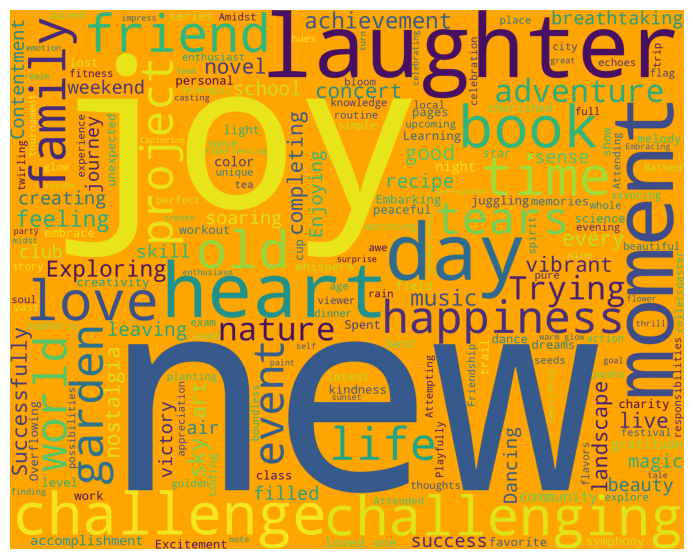

Negative words


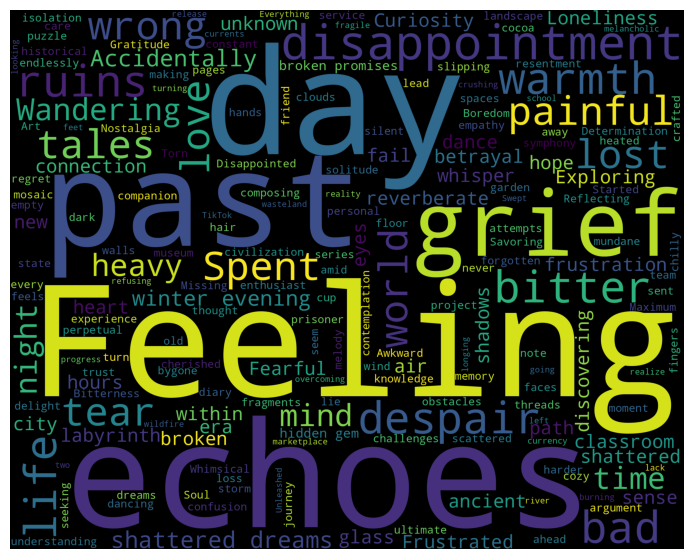

In [21]:
def wordcloud_draw(data,color='orange'):
  words=' '.join(data)
  cleaned_word=" ".join([word for word in words.split() if 'http' not in word and not word.split()])
  wordcloud=WordCloud(stopwords=STOPWORDS,background_color=color,width=2500,height=2000).generate(words)
  plt.figure(1,figsize=(10,7))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
print('Positive words')
wordcloud_draw(train_positive,'orange')
print('Negative words')
wordcloud_draw(train_negative,'black')

In [22]:
 import nltk
 nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
tweets=[]
stopwords_set=set(stopwords.words("english"))
for index,row in train.iterrows():
  words_filtered=[e.lower() for e in row.Text.split() if len(e)>=3]
  words_cleaned=[word for word in words_filtered if 'http' not in word and not word.startswith('@') and word!='RT']
  words_without_stopwords=[word for word in words_cleaned if not word in stopwords_set]
  tweets.append((words_without_stopwords,row.Sentiment))

In [24]:
test_positive = test[ test['Sentiment'] == 'positive']
test_positive = test_positive['Text']
test_negative = test[ test['Sentiment'] == 'negative']
test_negative = test_negative['Text']


In [26]:
test_positive

,Text
727,Collaborating on a science project that receiv...
473,"Chasing dreams under the vibrant sky, a journe..."
566,"Embracing the aroma of freshly baked bread, th..."
381,Radiant joy akin to blooming flowers on a sun-...
544,"In the tennis grand slam, a fierce rivalry unf..."
58,Sharing love and positive vibes with everyone...
725,Participating in a school-wide art exhibition....
515,Immersed in the pulsating beats of a Bruno Mar...
132,Enthusiasm for a creative project in the maki...
717,Participating in a debate club to enhance crit...


In [27]:
test_negative

,Text
697,Facing rejection from a dream college. Dishear...
176,"Drowning in despair, hope slipping through my..."
12,Exploring the city's hidden gems. ...
242,"Embracing the beauty in imperfections, findin..."
692,Caught in a torrential rainstorm without an um...
669,Perfecting the art of creating origami during ...
617,"Attended a lecture on history, always fascinat..."
171,Intimidation by the unknown future ahead. ...
621,"Joined a writing group, penning down thoughts ..."
209,"Numb to the chaos, emotions locked away, a st..."


In [28]:
# Extracting the features of words
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


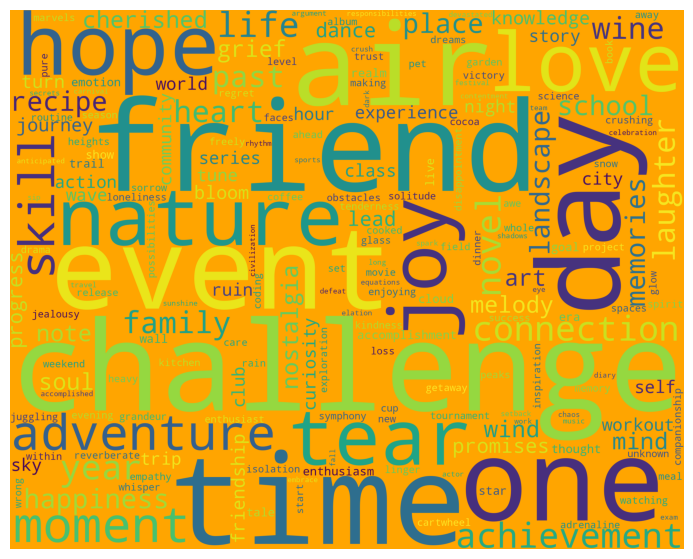

In [29]:
wordcloud_draw(w_features)

In [30]:
#using Naive Bayes classifier
training_set=nltk.classify.apply_features(extract_features,tweets)
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [31]:
classifier.show_most_informative_features(20)

Most Informative Features
     contains(shattered) = True           negati : positi =     11.5 : 1.0
        contains(bitter) = True           negati : positi =      8.4 : 1.0
        contains(warmth) = True           negati : positi =      8.4 : 1.0
        contains(winter) = True           negati : positi =      8.4 : 1.0
  contains(accidentally) = True           negati : positi =      6.9 : 1.0
        contains(hidden) = True           negati : positi =      6.9 : 1.0
        contains(echoes) = True           negati : positi =      5.6 : 1.0
       contains(despair) = True           negati : positi =      5.4 : 1.0
         contains(fail:) = True           negati : positi =      5.4 : 1.0
     contains(labyrinth) = True           negati : positi =      5.4 : 1.0
        contains(dreams) = True           negati : positi =      5.1 : 1.0
           contains(new) = True           positi : negati =      4.5 : 1.0
     contains(forgotten) = True           negati : positi =      3.8 : 1.0

**Train Set**

In [32]:
negative_count=0
positive_count=0
for object in train_negative:
  res=classifier.classify(extract_features(object.split()))
  if(res=='negative'):
    negative_count=negative_count+1
for object in train_positive:
  res=classifier.classify(extract_features(object.split()))
  if(res=='positive'):
    positive_count=positive_count+1
print('Negative',(len(train_negative),negative_count))
print('positive',(len(train_positive),positive_count))


Negative (110, 106)
positive (254, 253)


**Test Set**

In [36]:
negative_count = 0
positive_count = 0
for object in test_negative:
  res = classifier.classify(extract_features(object.split()))
  if(res == 'negative'):
    negative_count = negative_count + 1
for object in test_positive:
  res = classifier.classify(extract_features(object.split()))
  if(res == 'positive'):
    positive_count = positive_count + 1

print('[negative]: %s/%s '% (len(test_negative),negative_count))
print('[positive]: %s/%s '% (len(test_positive),positive_count))


[negative]: 16/3 
[positive]: 28/28 
